# Maximum Likelihood Estimation

Maximum likelihood estimation identifies the parameter value(s) that **maximizes the probability of observing the data**, essentially asking "which model would make what we actually saw most likely to occur?"

# Graphical Summary

![Fig](./graphical_summary/slides/Slide20.png)

# Key Formula

Maximum Likelihood Estimation (MLE) is a method for estimating the parameters of a statistical model. Given a model $\text{M}$ parameterized by $\theta$, MLE selects the parameter value $\hat{\theta}_\text{MLE}$ that maximizes the likelihood function, that is, the value that makes the observed data most probable under the model:

$$
\hat{\theta}_\text{MLE} = \underset{\theta \in \Theta}{\operatorname{arg\,max}}\ \mathcal{L}(\theta\mid\text{D}) = \underset{\theta \in \Theta}{\operatorname{arg\,max}}\ P(\text{D}\mid\theta)
$$

**Where:**
- $\hat{\theta}_\text{MLE}$ is the maximum likelihood estimate (the "hat" indicates it's an estimate of the true parameter $\theta$)
- $\theta$ represents the parameter(s) we want to estimate (e.g., $\beta$ in a genetic model)
- $\Theta$ is the parameter space containing all possible values of $\theta$
- $\text{D}$ is the observed data
- $\operatorname{arg\,max}$ means "the argument (value of $\theta$) that maximizes the function"


# Technical Details

## Work With Log-Likelihood

As discussed in [Lecture: likelihood](https://statfungen.github.io/statgen-primer/likelihood.html), we often work with the log-transformed likelihood function:

$$
\ell(\theta \mid \text{D}) = \log \mathcal{L}(\theta \mid \text{D})
$$

When we search for $\hat{\theta}_\text{MLE}$ that maximizes $\mathcal{L}(\theta \mid \text{D})$, it is equivalent to maximizing $\ell(\theta \mid \text{D})$ because the logarithm is a monotonically increasing function. This transformation is particularly useful because:

1. **Numerical stability**: Likelihood values can be extremely small, leading to numerical underflow
2. **Computational convenience**: Products become sums, which are easier to work with
3. **Mathematical tractability**: Many probability distributions have simpler derivatives in log form

## Likelihood Equations

If $\ell(\theta \mid \text{D})$ is differentiable in $\Theta$, a necessary condition for the occurrence of a maximum is:

$$
\frac{\partial \ell(\theta \mid \text{D})}{\partial \theta} = 0
$$

These are known as the **likelihood equations** or **score equations**. Solving these equations yields candidate values for $\hat{\theta}_\text{MLE}$. In practice, we verify that the solution is indeed a maximum (rather than a minimum or saddle point) by checking second-order conditions, though for many standard problems the maximum is guaranteed by the structure of the likelihood function.

# Related Topics

- [likelihood](https://statfungen.github.io/statgen-primer/likelihood.html)
- [minor allele frequency](https://statfungen.github.io/statgen-primer/minor_allele_frequency.html)
- [ordinary least squares](https://statfungen.github.io/statgen-primer/ordinary_least_squares.html)
- [summary statistics](https://statfungen.github.io/statgen-primer/summary_statistics.html)


# Example

So far we've been comparing different models with fixed parameter values - like comparing Model 1 ($\beta = 0$) versus Model 2 ($\beta = 0.5$) versus $\beta = 1.0$. But what if instead of limiting ourselves to just a few specific values, we want to find the **single best parameter value that maximizes the likelihood**?

This is exactly what maximum likelihood estimation (MLE) does. Instead of testing a handful of models, **MLE searches across all possible parameter values to find the one that makes our observed data most likely**.

We'll explore this through two examples:

1. **Allele frequency example**: We estimate the frequency of the risk allele using genotype data from 5 individuals, demonstrating both numerical and analytical approaches to finding the MLE.

2. **Genetic effect example**: We estimate the genetic effect size ($\beta$) that best explains the relationship between genotype and phenotype in our sample, building on the likelihood framework from previous lectures.

## Example 1 -- Allele Frequency

We want to estimate the frequency of the T allele in the population. In [Lecture: minor allele frequency](https://statfungen.github.io/statgen-primer/minor_allele_frequency.html), we used simple counting. However, geneticists typically prefer MLE because it handles missing data naturally and provides more stable estimates with small sample sizes.

**Question**: What is the most plausible frequency of the T allele that would generate our observed genotypes?

### Setup

In [1]:
# Clear the environment
rm(list = ls())
library(ggplot2)
# Observed genotypes
genotypes <- c("CC", "TT", "CT", "CC", "CC")
names(genotypes) <- paste("Individual", 1:5)

# Define alleles for this variant
alt_allele <- "T"  # alternative allele
ref_allele <- "C"  # reference allele

### Likelihood and Log-Likelihood

Let $f_T$ denote the frequency of the `T` allele. We observe genotype data from 5 individuals: CC, TT, CT, CC, and CC. This corresponds to 3 `T` alleles out of 10 total alleles (since each individual carries 2 alleles).

Under Hardy-Weinberg equilibrium, the genotype probabilities are:
- CC: $(1-f_T)^2$
- TT: $f_T^2$ 
- CT: $2f_T(1-f_T)$

The likelihood of observing our specific data is the product of individual genotype probabilities:

$$
\mathcal{L}(f_T \mid \text{D}) = P(\text{CC}|f_T) \times P(\text{TT}|f_T) \times P(\text{CT}|f_T) \times P(\text{CC}|f_T) \times P(\text{CC}|f_T)
$$

$$
= \underbrace{(1-f_T)^2}_{\text{Ind. 1}} \times \underbrace{f_T^2}_{\text{Ind. 2}} \times \underbrace{2f_T(1-f_T)}_{\text{Ind. 3}} \times \underbrace{(1-f_T)^2}_{\text{Ind. 4}} \times \underbrace{(1-f_T)^2}_{\text{Ind. 5}}
$$

$$
= 2f_T^3(1-f_T)^7
$$

In [2]:
# Define likelihood and log-likelihood functions
likelihood <- function(f_T) {
    2 * f_T^3 * (1 - f_T)^7
}

log_likelihood <- function(f_T) {
    log(2) + 3 * log(f_T) + 7 * log(1 - f_T)
}


### MLE

We can find the MLE using R's `optimize` function and verify it matches the analytical solution.

In [3]:
# Find MLE using optimize function
mle_result <- optimize(log_likelihood, interval = c(0.001, 0.999), maximum = TRUE)
f_T_mle_numeric <- mle_result$maximum

cat("MLE using optimize():", round(f_T_mle_numeric, 4), "\n")

MLE using optimize(): 0.3 


In such a simple example, we can also find $\hat{f_T}$ analytically using calculus. Taking the log-likelihood:

$$
\ell(f_T \mid \text{D}) = \ln(2) + 3\ln(f_T) + 7\ln(1-f_T)
$$

Setting the derivative equal to zero:

$$
\frac{d\ell}{df_T} = \frac{3}{f_T} - \frac{7}{1-f_T} = 0
$$

Solving:

$$
\frac{3}{f_T} = \frac{7}{1-f_T} \implies 3(1-f_T) = 7f_T \implies f_T = \frac{3}{10} = 0.3
$$

The second derivative is negative, confirming this is a maximum:

$$
\frac{d^2\ell}{df_T^2} = -\frac{3}{f_T^2} - \frac{7}{(1-f_T)^2} < 0 \text{ for } f_T \in (0,1)
$$

### Visualization

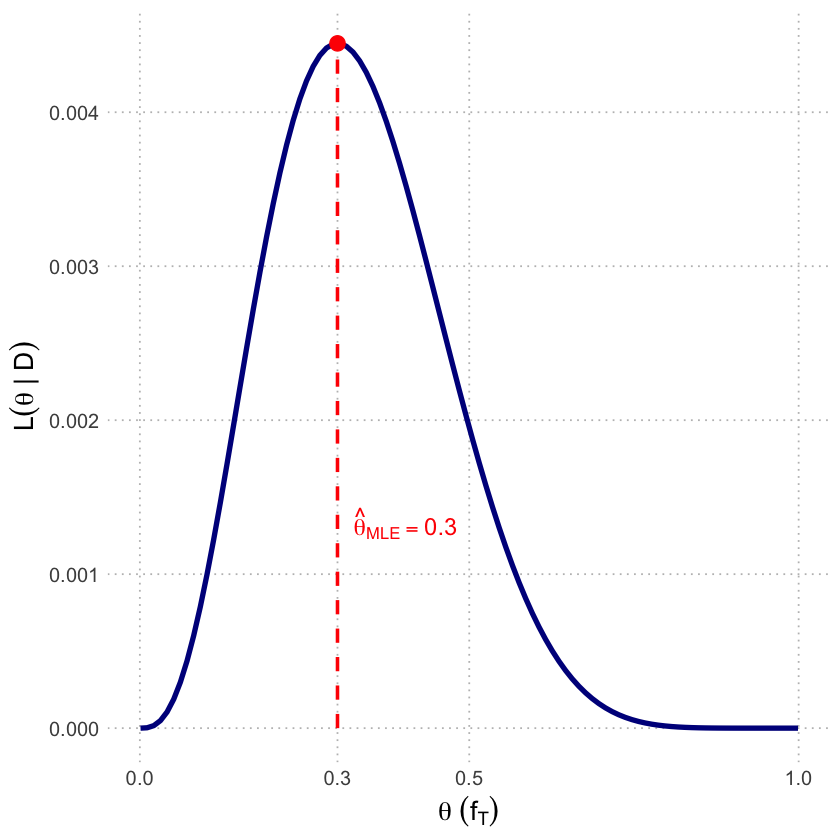

In [4]:
# Generate data for plotting
f_T <- seq(0.001, 0.999, length = 100)

df_lik <- data.frame(
  theta = f_T,
  Likelihood = likelihood(f_T)
)

df_loglik <- data.frame(
  theta = f_T,
  LogLikelihood = log_likelihood(f_T)
)

# Use the MLE value
f_T_mle <- f_T_mle_numeric
L_mle <- likelihood(f_T_mle)
l_mle <- log_likelihood(f_T_mle)

# Plot 1a: Likelihood
# Plot 1a: Likelihood
p1a <- ggplot(df_lik, aes(x = theta, y = Likelihood)) +
  geom_line(color = "darkblue", linewidth = 1.5) +
  # Highlight MLE
  annotate("segment", x = f_T_mle, xend = f_T_mle, y = 0, yend = L_mle,
           color = "red", linetype = "dashed", linewidth = 1) +
  annotate("point", x = f_T_mle, y = L_mle, color = "red", size = 4) +
  
  # Add the Text Label
  annotate("text", 
           x = f_T_mle + 0.025,           # Nudge right
           y = L_mle * 0.3,              # Position slightly below the peak
           label = paste0("hat(theta)[MLE] == ", round(f_T_mle, 4)),
           parse = TRUE, 
           color = "red", 
           hjust = 0, 
           size = 5) +
  
  scale_x_continuous(breaks = c(0, 0.3, 0.5, 1.0)) +
  labs(x = expression(theta~(f[T])), 
       y = expression(L(theta~'|'~D))) +
  theme_minimal() +
  theme(
    text = element_text(size = 14),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 12),
    panel.grid.major = element_line(color = "gray", linetype = "dotted"),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "transparent", color = NA),
    plot.background = element_rect(fill = "transparent", color = NA),
  )

print(p1a)

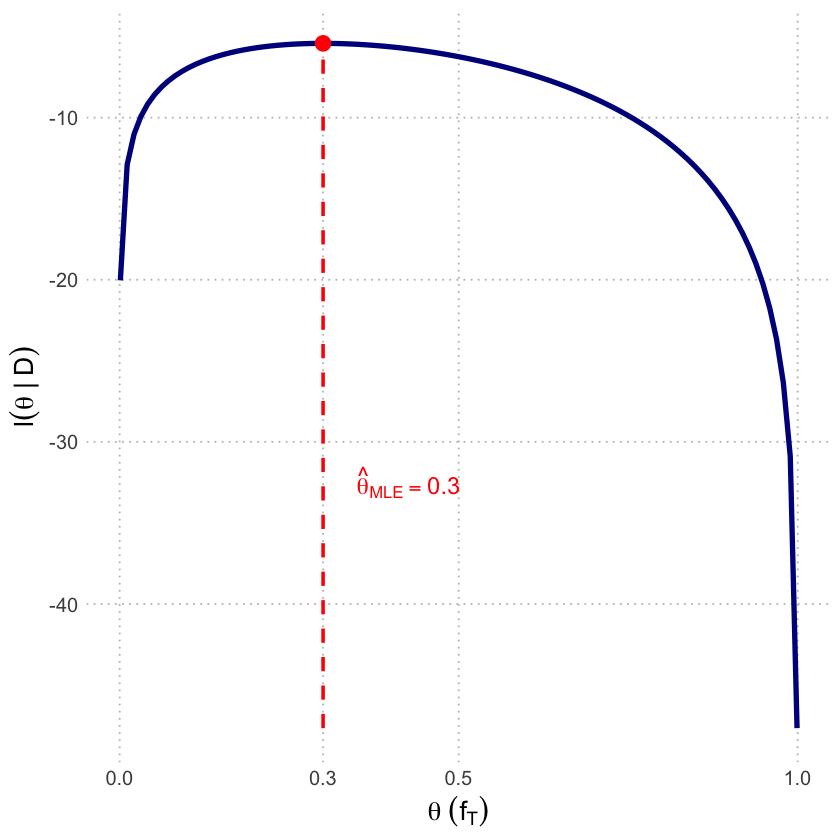

In [5]:
# Plot 1b: Log-likelihood
p1b <- ggplot(df_loglik, aes(x = theta, y = LogLikelihood)) +
  geom_line(color = "darkblue", linewidth = 1.5) +
  # Highlight MLE (Line from bottom to peak)
  annotate("segment", 
           x = f_T_mle, xend = f_T_mle, 
           y = min(df_loglik$LogLikelihood), yend = l_mle,
           color = "red", linetype = "dashed", linewidth = 1) +
  annotate("point", x = f_T_mle, y = l_mle, color = "red", size = 4) +
  
  # Add the Text Label
  annotate("text", 
           x = f_T_mle + 0.05,
           y = l_mle*6,
           label = paste0("hat(theta)[MLE] == ", round(f_T_mle, 4)),
           parse = TRUE, 
           color = "red", 
           hjust = 0, 
           size = 5) +
           
  scale_x_continuous(breaks = c(0, 0.3, 0.5, 1.0)) +
  labs(x = expression(theta~(f[T])), 
       y = expression(l(theta~'|'~D))) +
  theme_minimal() +
  theme(
    text = element_text(size = 14),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 12),
    panel.grid.major = element_line(color = "gray", linetype = "dotted"),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "transparent", color = NA),
    plot.background = element_rect(fill = "transparent", color = NA)
  )

print(p1b)

In [6]:
# Save plots
ggsave("./figures/mle_allele_freq_likelihood.png", plot = p1a,
       width = 7, height = 6, dpi = 300, bg = "transparent")
ggsave("./figures/mle_allele_freq_loglikelihood.png", plot = p1b,
       width = 7, height = 6, dpi = 300, bg = "transparent")


## Example 2 -- Genetic Effect

In the example in [Lecture: likelihood](https://statfungen.github.io/statgen-primer/likelihood.html), we see that Model 2 ($\beta = 0.5$) performs better than both Model 1 ($\beta = 0$) and Model 3 ($\beta = 1.0$). But this raises an interesting question: we only tested three specific values. What if the optimal $\beta$ is somewhere between 0.5 and 1.0, or maybe 0.4 or 0.6? 

Instead of guessing more values to test, we can use MLE to find $\hat{\beta}$ that maximizes the likelihood function. Then we can compare this optimal estimate to our models - particularly the null model ($\beta = 0$), which is often of special interest in genetics because it represents "no genetic effect."

### Setup

In [7]:
# Clear the environment
rm(list = ls())
set.seed(19) 

# Generate genotype data for 5 individuals at a single variant
N <- 5
genotypes <- c("CC", "CT", "TT", "CT", "CC")  # Individual genotypes
names(genotypes) <- paste("Individual", 1:N)

# Define alternative allele
alt_allele <- "T"

# Convert to additive genotype coding (count of alternative alleles)
Xraw_additive <- numeric(N)
for (i in 1:N) {
  alleles <- strsplit(genotypes[i], "")[[1]]
  Xraw_additive[i] <- sum(alleles == alt_allele)
}
names(Xraw_additive) <- names(genotypes)

# Standardize genotypes
X <- scale(Xraw_additive, center = TRUE, scale = TRUE)[,1]

# Set true beta and generate phenotype data
true_beta <- 0.4
true_sd <- 1.0

# Generate phenotype with true effect
Y <- X * true_beta + rnorm(N, 0, true_sd)

### Likelihood and Log-Likelihood

In [8]:
# Likelihood function for normal distribution
likelihood <- function(beta, sd, X, Y) {
  # Calculate expected values under the model
  mu <- X * beta
  # Calculate likelihood (product of normal densities)
  prod(dnorm(Y, mean = mu, sd = sd, log = FALSE))
}

# Log-likelihood function (more numerically stable)
log_likelihood <- function(beta, sd, X, Y) {
  # Calculate expected values under the model
  mu <- X * beta
  # Calculate log-likelihood (sum of log normal densities)
  sum(dnorm(Y, mean = mu, sd = sd, log = TRUE))
}


### MLE

In [9]:
# Find the MLE by optimizing the log-likelihood function
mle_result <- optimize(log_likelihood, 
                       interval = c(-2, 2),  # Search range for beta
                       maximum = TRUE,       # We want to maximize
                       sd = true_sd, 
                       X = X, 
                       Y = Y)

beta_mle_numeric <- mle_result$maximum
log_lik_mle <- mle_result$objective

cat("MLE using optimize():", round(beta_mle_numeric, 4), "\n")


MLE using optimize(): 0.3169 


Other than the figure, we can also derive the MLE analytically using calculus. This shows how we can find the optimal value across the entire parameter space. But please note that in more complicated cases it is almost impossible to get explicit solutions. For our model $Y = X \beta + \epsilon$ where $\epsilon \sim N(0, \sigma^2)$, the MLE is:

$$
\hat{\beta} = \frac{\sum_{i=1}^n X_i Y_i}{\sum_{i=1}^n X_i^2}
$$
This formula comes from setting the derivative of the log-likelihood equal to zero and solving analytically. The beauty is that we can compute the exact MLE without any iterative search.

In [10]:
# Analytical solution: For Y = X*beta + epsilon with epsilon ~ N(0, sigma^2)
# The MLE is: beta_hat = sum(X_i * Y_i) / sum(X_i^2)
beta_mle_analytical <- sum(X * Y) / sum(X^2)
cat("MLE analytical solution:", round(beta_mle_analytical, 4), "\n")

MLE analytical solution: 0.3169 


### Visualization

In [11]:
# Generate data for plotting
beta_range <- seq(-1, 1.5, length.out = 100)
likelihood_values <- sapply(beta_range, function(b) likelihood(b, true_sd, X, Y))
log_likelihood_values <- sapply(beta_range, function(b) log_likelihood(b, true_sd, X, Y))

# Create data frames
df_lik <- data.frame(
  beta = beta_range,
  Likelihood = likelihood_values
)

df_loglik <- data.frame(
  beta = beta_range,
  LogLikelihood = log_likelihood_values
)

# Use the MLE value
beta_mle <- beta_mle_numeric
lik_mle <- likelihood(beta = beta_mle, sd = true_sd, X = X, Y = Y)
log_lik_mle <- log_likelihood(beta = beta_mle, sd = true_sd, X = X, Y = Y)


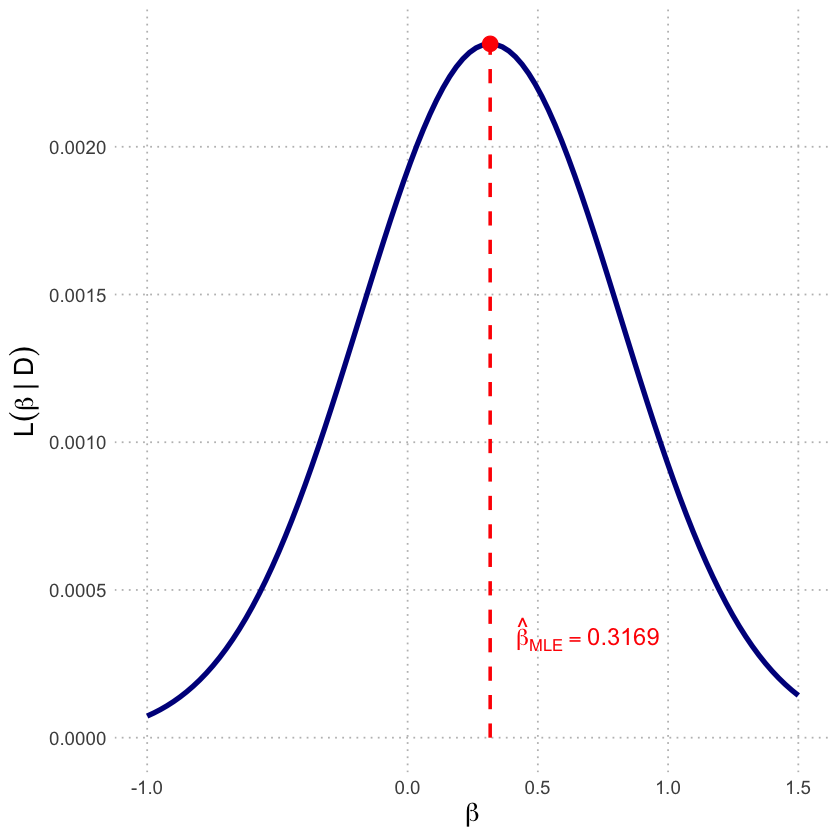

In [12]:
p2a <- ggplot(df_lik, aes(x = beta, y = Likelihood)) +
  geom_line(color = "darkblue", linewidth = 1.5) +
  # Highlight MLE line and point
  annotate("segment", x = beta_mle, xend = beta_mle, y = 0, yend = lik_mle,
           color = "red", linetype = "dashed", linewidth = 1) +
  annotate("point", x = beta_mle, y = lik_mle, color = "red", size = 4) +
  
  # Add the Text Label
  annotate("text", 
           x = beta_mle + 0.1,  # Nudges the text to the right of the point
           y = lik_mle*0.15,         # Aligns with the peak height
           label = paste0("hat(beta)[MLE] == ", round(beta_mle, 4)),
           parse = TRUE,        # This turns the string into math symbols
           color = "red", 
           hjust = 0,           # Left-aligns text so it doesn't overlap the point
           size = 5) +
  
  # Axis and Labels
  scale_x_continuous(breaks = c(-1, 0, 0.5, 1, 1.5)) +
  labs(x = expression(beta), 
       y = expression(L(beta~'|'~D))) +
  theme_minimal() +
  theme(
    text = element_text(size = 14),
    axis.title = element_text(size = 16),
    panel.grid.major = element_line(color = "gray", linetype = "dotted"),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "transparent", color = NA),
    plot.background = element_rect(fill = "transparent", color = NA)
  )

print(p2a)

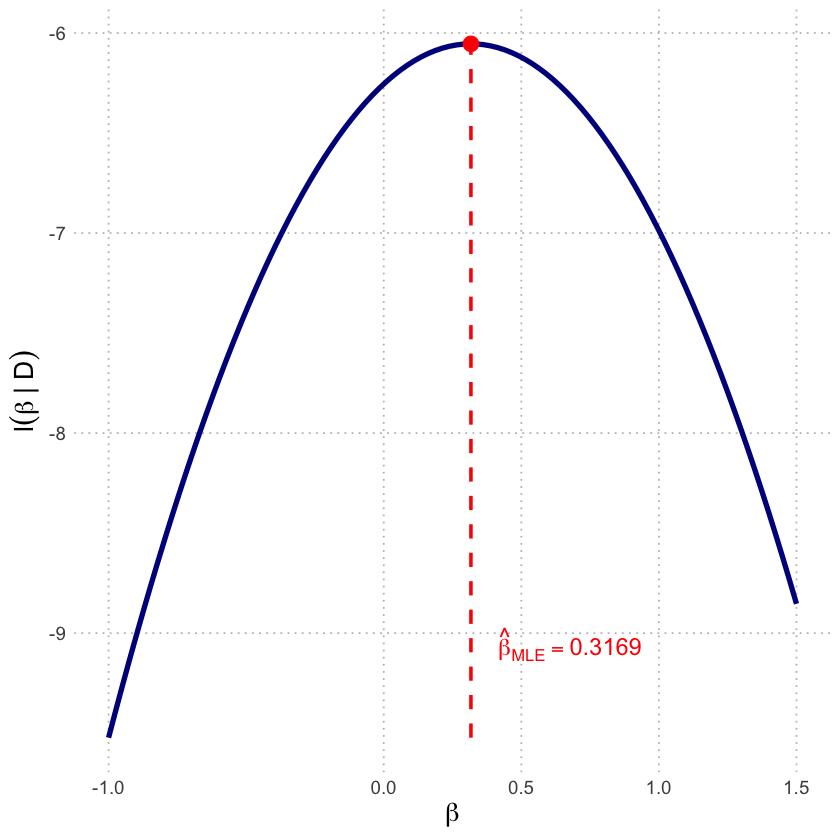

In [13]:
p2b <- ggplot(df_loglik, aes(x = beta, y = LogLikelihood)) +
  geom_line(color = "darkblue", linewidth = 1.5) +
  # Highlight MLE (Segment starts from the bottom of the current data)
  annotate("segment", x = beta_mle, xend = beta_mle, 
           y = min(df_loglik$LogLikelihood), yend = log_lik_mle,
           color = "red", linetype = "dashed", linewidth = 1) +
  annotate("point", x = beta_mle, y = log_lik_mle, color = "red", size = 4) +
  
  # Add the Text Label
  annotate("text", 
           x = beta_mle + 0.1,
           y = log_lik_mle - 3,
           label = paste0("hat(beta)[MLE] == ", round(beta_mle, 4)),
           parse = TRUE, 
           color = "red", 
           hjust = 0, 
           size = 5) +
  
  # Axis and Labels
  scale_x_continuous(breaks = c(-1, 0, 0.5, 1, 1.5)) +
  labs(x = expression(beta), 
       y = expression(l(beta~'|'~D))) +
  theme_minimal() +
  theme(
    text = element_text(size = 14),
    axis.title = element_text(size = 16),
    panel.grid.major = element_line(color = "gray", linetype = "dotted"),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "transparent", color = NA),
    plot.background = element_rect(fill = "transparent", color = NA)
  )

print(p2b)